In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [5]:
df.info()  # вывод сведений о типах признаков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
df.drop(['studytime, granular'], inplace=True, axis=1)

In [7]:
object_columns = df.dtypes[df.dtypes == 'object'].index

df.age = np.float64(df.age)

float_columns = df.dtypes[df.dtypes == 'float64'].index

In [8]:
def float_histplot(colm_name):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.histplot(df[colm_name], ax=ax)
    ax.set_title('Hist for ' + colm_name)

    plt.show()

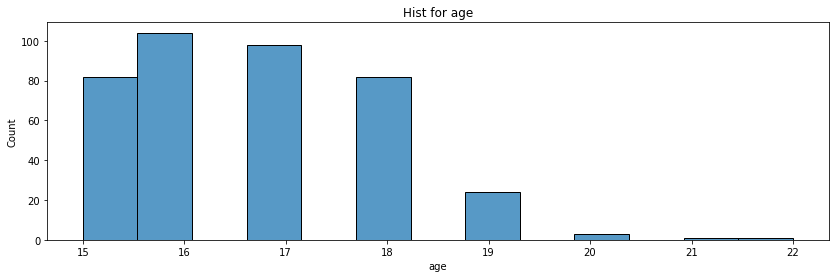

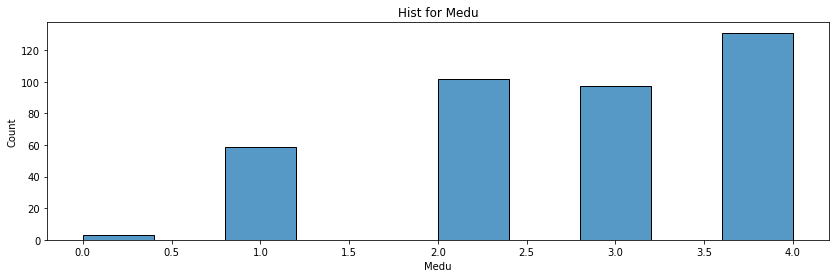

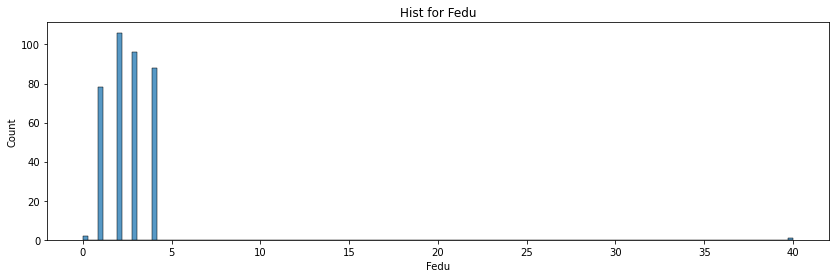

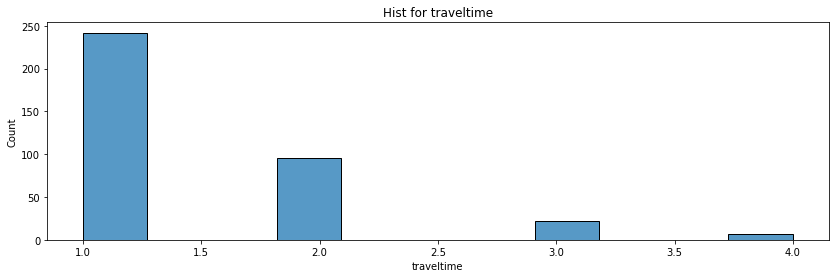

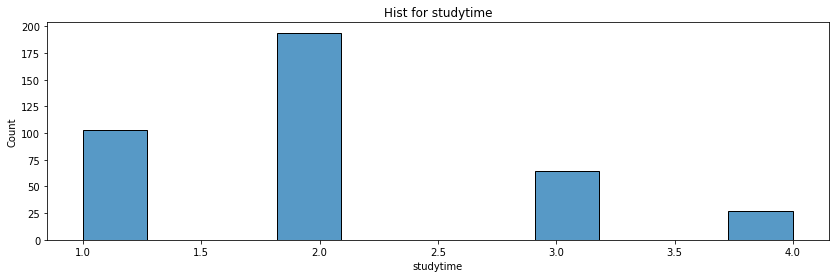

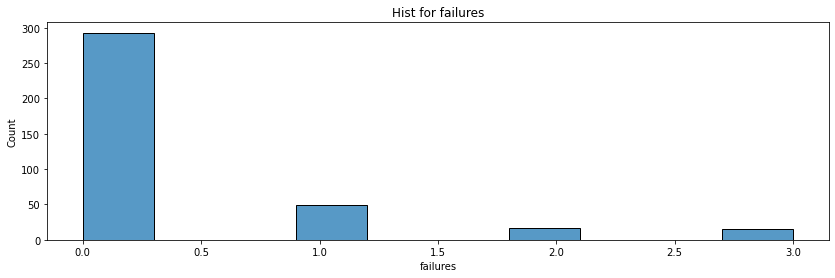

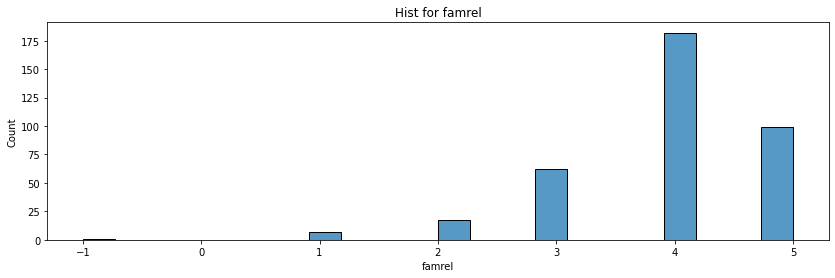

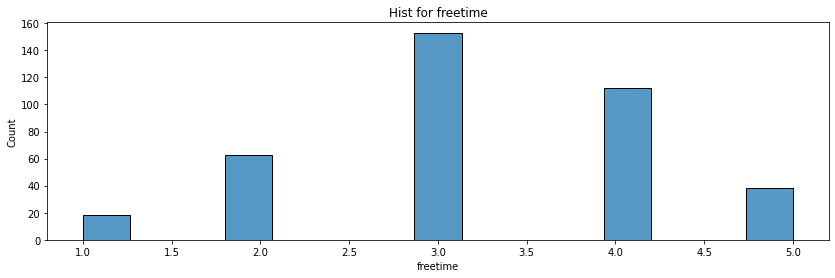

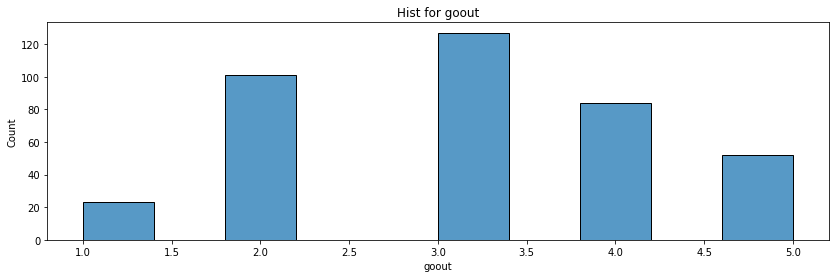

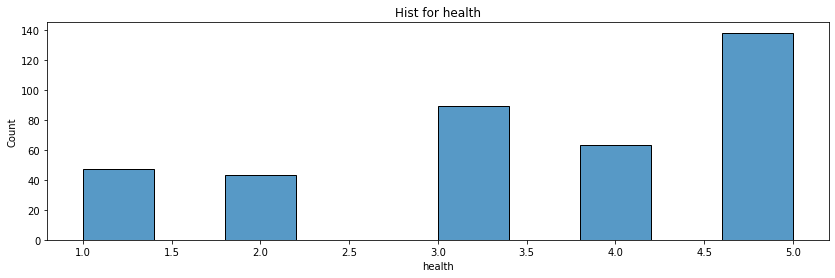

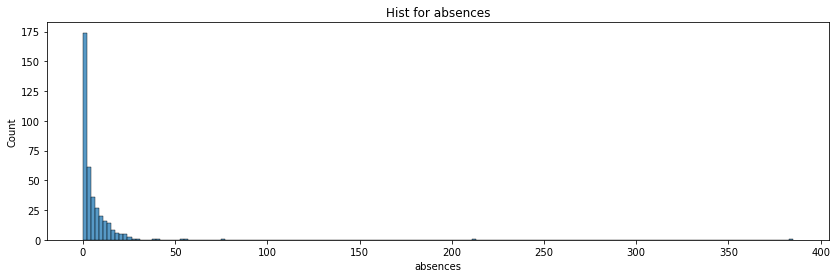

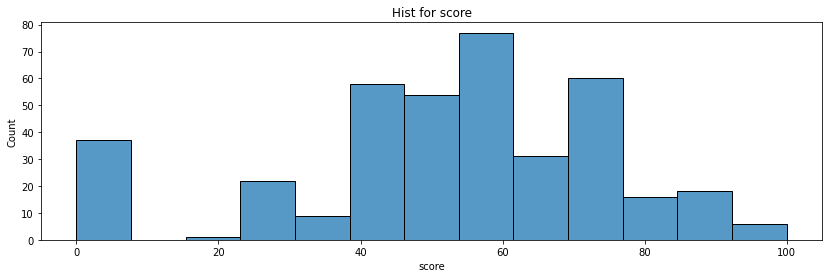

In [9]:
for col in float_columns:
    float_histplot(col)

In [10]:
def colum_contain_nan(column):
    if df[column].isnull().values.any():
        print(column)
        df[column].fillna(df[column].mean())


print('Признаки содержащие пропуски:')
for col in float_columns:
    colum_contain_nan(col)

Признаки содержащие пропуски:
Medu
Fedu
traveltime
studytime
failures
famrel
freetime
goout
health
absences
score


In [11]:
"""
Замена пропусков в числовых данных на среднее значение по признаку
"""
for col in float_columns:
    df[col].fillna(df[col].mean())

In [12]:
"""
В соответсвии с описанием чиловых признаков можно заметить что они все должны быть больше нуля.
Также уберем выброс в признаке Fedu.
"""
for col in float_columns:
    df = df.loc[df[col] >= 0]

df = df.loc[df.Fedu <= 4]

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


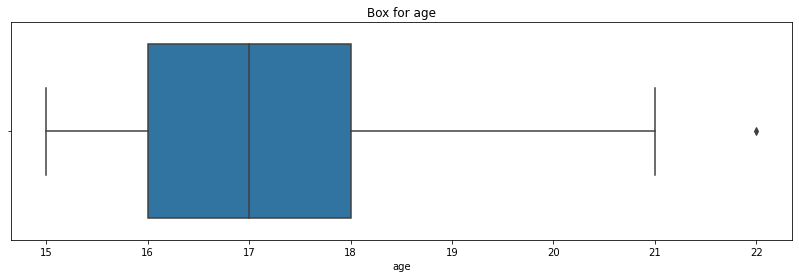

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


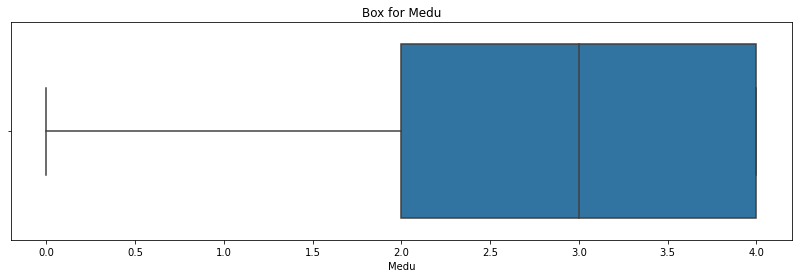

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


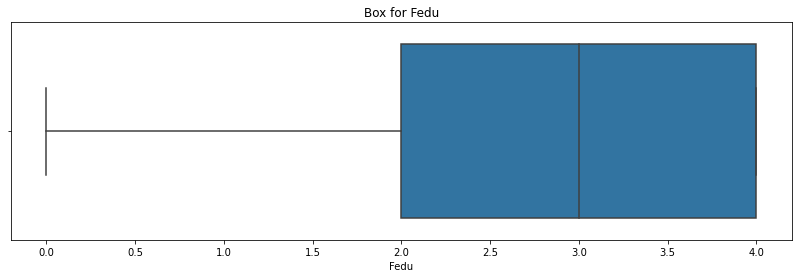

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


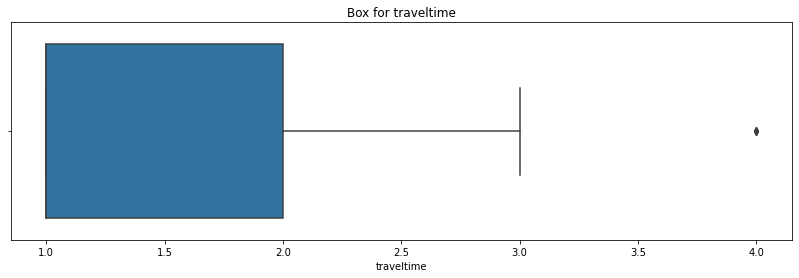

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


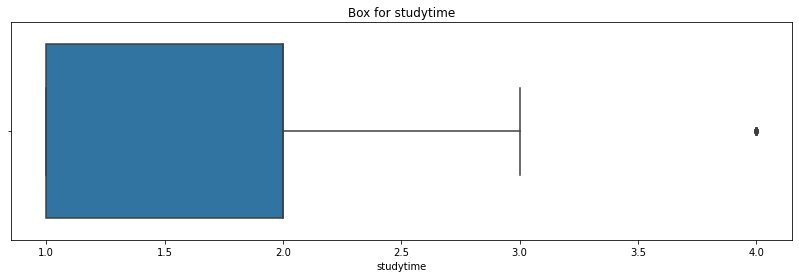

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


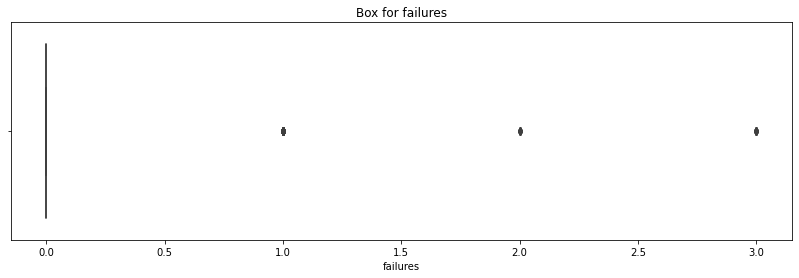

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


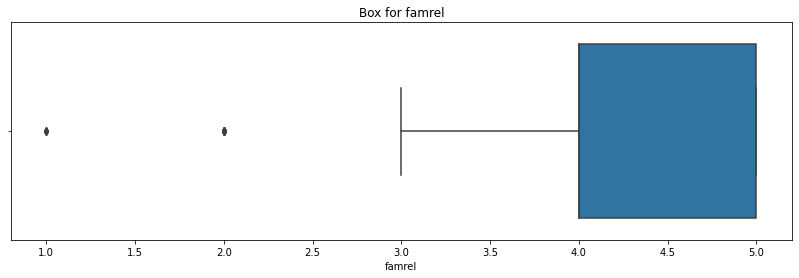

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


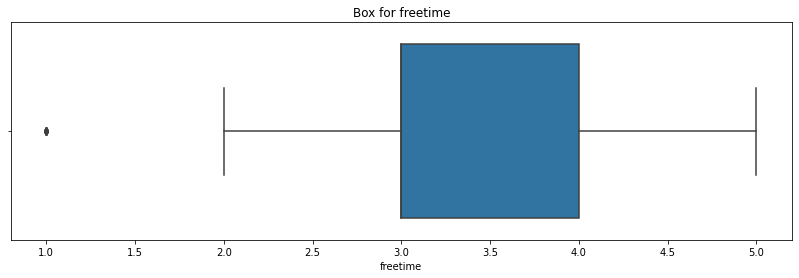

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


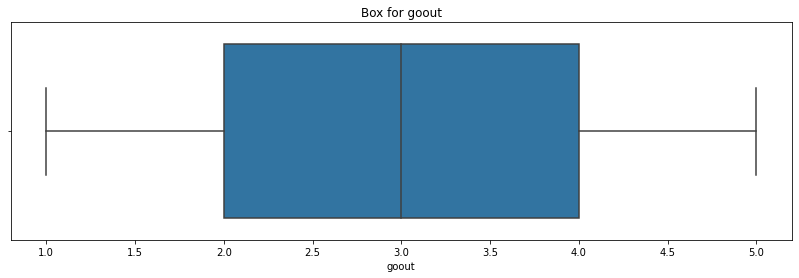

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


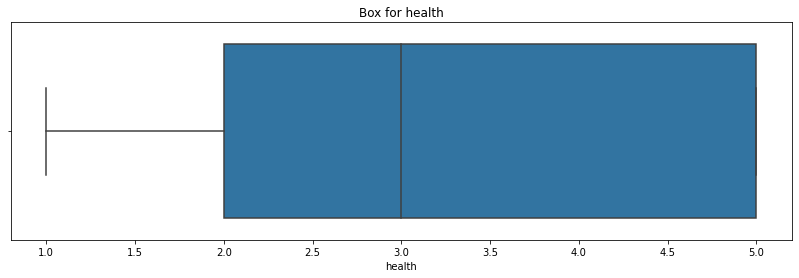

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


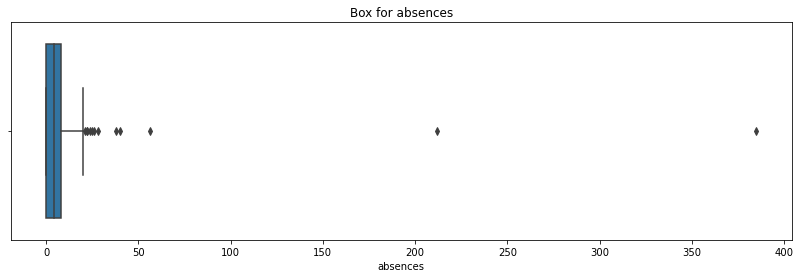

/home/artem/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


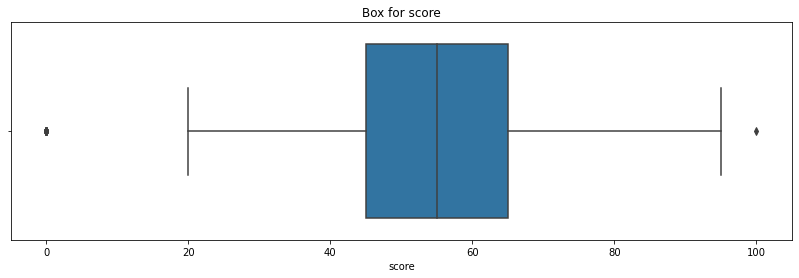

In [13]:
""""""


def float_boxplot(colm_name):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(df[colm_name], ax=ax)
    ax.set_title('Box for ' + colm_name)

    plt.show()


for col in float_columns:
    float_boxplot(col)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160365,-0.151352,0.083493,-0.055729,0.201953,0.074502,0.016846,0.094987,-0.021283,0.079032,-0.139597
Medu,-0.160365,1.000000,0.633767,-0.160368,0.077962,-0.196787,-0.057427,-0.020424,0.061252,-0.085083,-0.026746,0.159584
Fedu,-0.151352,0.633767,1.000000,-0.192235,0.002944,-0.246231,-0.053086,-0.066469,0.005401,0.012071,0.027926,0.082031
traveltime,0.083493,-0.160368,-0.192235,1.000000,-0.139395,0.009613,-0.018055,0.026623,-0.017928,0.032965,-0.067757,-0.043429
studytime,-0.055729,0.077962,0.002944,-0.139395,1.000000,-0.130716,0.056317,-0.154578,-0.110632,-0.094829,-0.015536,0.072204
failures,0.201953,-0.196787,-0.246231,0.009613,-0.130716,1.000000,0.002949,0.160078,0.071851,0.085779,0.067151,-0.323536
famrel,0.074502,-0.057427,-0.053086,-0.018055,0.056317,0.002949,1.000000,0.173191,0.066400,0.119268,-0.088148,0.001448
freetime,0.016846,-0.020424,-0.066469,0.026623,-0.154578,0.160078,0.173191,1.000000,0.284630,0.150614,0.042485,0.029454
goout,0.094987,0.061252,0.005401,-0.017928,-0.110632,0.071851,0.066400,0.284630,1.000000,0.037142,-0.049952,-0.169684
health,-0.021283,-0.085083,0.012071,0.032965,-0.094829,0.085779,0.119268,0.150614,0.037142,1.000000,-0.025795,-0.026538


<AxesSubplot:>

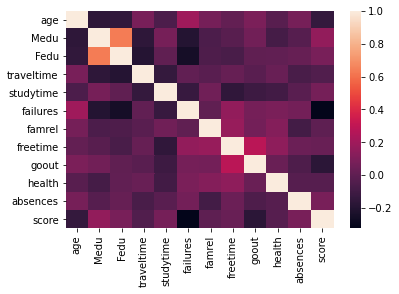

In [14]:
"""
Проверить данные на кореляционную связь между признаками.
Видим что зависимость среди переменных Fedu и Medu.
Но с логической точки зрения считаю что не стуит исключать какую-то из этих переменных.
"""
display(df.corr())
sns.heatmap(df.corr())

In [15]:
for col in object_columns:
    percent_missing = df[col].isnull().sum() * 100 / len(df[col])
    print("Процент пропусков в признаке "+col +
          ": "+str(round(percent_missing, 1)))

Процент пропусков в признаке school: 0.0
Процент пропусков в признаке sex: 0.0
Процент пропусков в признаке address: 3.1
Процент пропусков в признаке famsize: 5.4
Процент пропусков в признаке Pstatus: 9.6
Процент пропусков в признаке Mjob: 3.8
Процент пропусков в признаке Fjob: 7.7
Процент пропусков в признаке reason: 5.0
Процент пропусков в признаке guardian: 9.6
Процент пропусков в признаке schoolsup: 3.1
Процент пропусков в признаке famsup: 10.7
Процент пропусков в признаке paid: 9.2
Процент пропусков в признаке activities: 4.2
Процент пропусков в признаке nursery: 5.0
Процент пропусков в признаке higher: 4.2
Процент пропусков в признаке internet: 8.8
Процент пропусков в признаке romantic: 5.7


In [16]:
for col in object_columns:
    df[col] = df[col].apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                            else None if x.strip() == '' else x)

In [17]:
"""Видно что значения переменных соответсвуют описанию данных"""
for col in object_columns:
    print(f"Уникальных значений для признака {col}:", df[col].nunique())

Уникальных значений для признака school: 2
Уникальных значений для признака sex: 2
Уникальных значений для признака address: 2
Уникальных значений для признака famsize: 2
Уникальных значений для признака Pstatus: 2
Уникальных значений для признака Mjob: 5
Уникальных значений для признака Fjob: 5
Уникальных значений для признака reason: 4
Уникальных значений для признака guardian: 3
Уникальных значений для признака schoolsup: 2
Уникальных значений для признака famsup: 2
Уникальных значений для признака paid: 2
Уникальных значений для признака activities: 2
Уникальных значений для признака nursery: 2
Уникальных значений для признака higher: 2
Уникальных значений для признака internet: 2
Уникальных значений для признака romantic: 2


In [30]:
"""Для тбора признаков наиболие значимых категориальны признаков используем слудующую функцию"""


def get_stat_dif(df: pd.DataFrame, column: object):
    cols = df.loc[:, column].value_counts()
    cols = cols[cols>15].index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'].dropna(),
                     df.loc[df.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                >= 0.075/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [31]:
nom_col = list(set(df.columns)- set(['age, absences', 'score']))
for col in object_columns:
    get_stat_dif(df, col)

Найдены статистически значимые различия для колонки school
Найдены статистически значимые различия для колонки Pstatus
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки reason
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки famsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки activities
Найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки internet
Найдены статистически значимые различия для колонки romantic


## В качестве признаков для модели считаю что стоит использовать все признаки исходных данных кроме признака пол(sex).

In [88]:
df_model = df.drop(['sex'], axis=1)